In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
# Load the datasets for 2021 and 2022
Data2021 = pd.read_csv(('/Users/lmc03/Library/CloudStorage/OneDrive-WentworthInstituteofTechnology/LMC_Individual_Project/Data/02745_2021.csv'), usecols=['DATE', 'TMAX', 'TMIN'], parse_dates=['DATE'])
Data2022 = pd.read_csv(('/Users/lmc03/Library/CloudStorage/OneDrive-WentworthInstituteofTechnology/LMC_Individual_Project/Data/2022_02745.csv'), usecols=['DATE', 'TMAX', 'TMIN'], parse_dates=['DATE'])

# Add derived columns for average temperature
Data2021['Average_Temp'] = (Data2021['TMAX'] + Data2021['TMIN']) / 2
Data2022['Average_Temp'] = (Data2022['TMAX'] + Data2022['TMIN']) / 2

# Combine datasets for overall analysis
FullData = pd.concat([Data2021, Data2022])

In [7]:
# Question 1: Average daily temperature over the past year
average_daily_temp = FullData['Average_Temp'].mean()
print(f"Average Daily Temperature: {average_daily_temp:.2f}°F")

Average Daily Temperature: 52.71°F


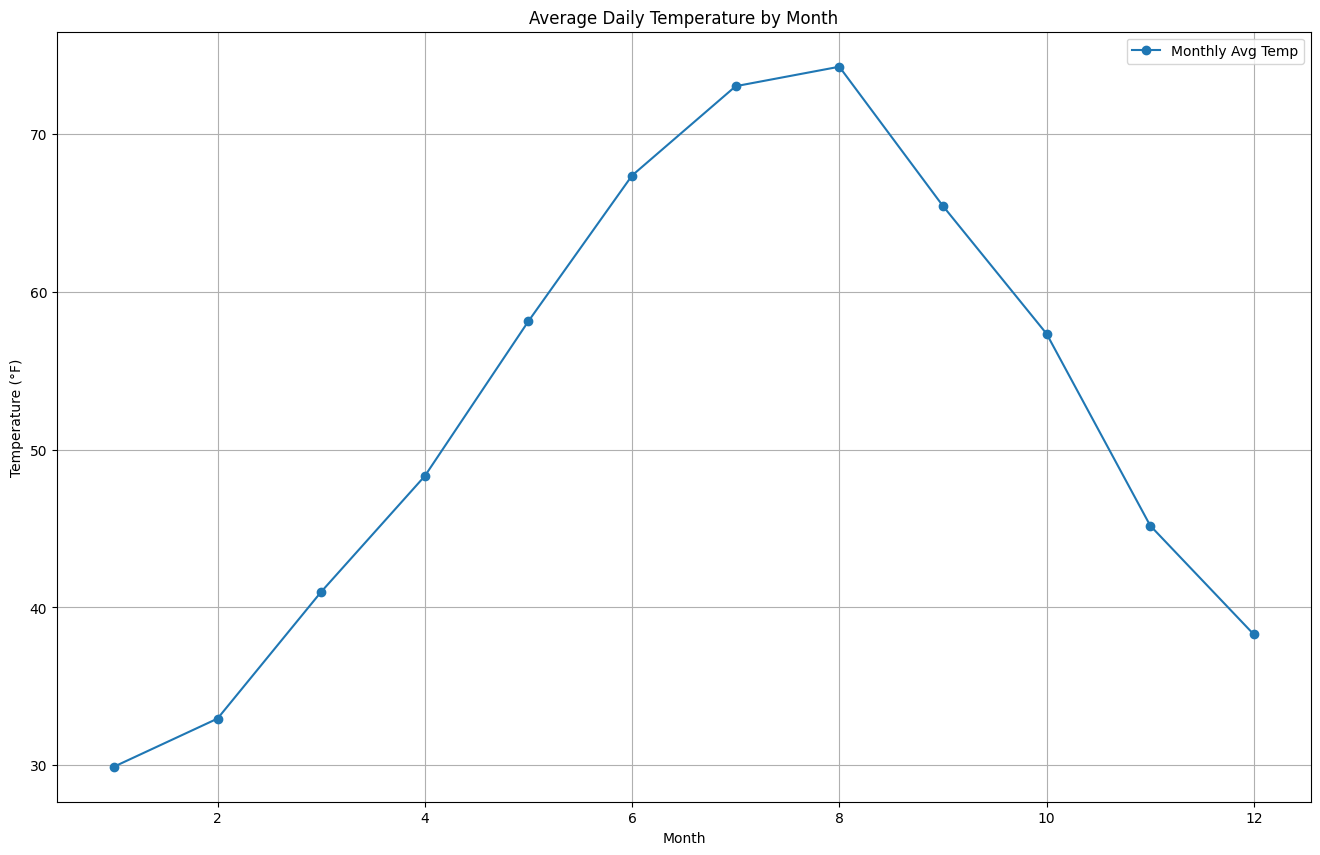

In [8]:
# Question 2: Daily temperature variation by month
FullData['Month'] = FullData['DATE'].dt.month
monthly_avg_temp = FullData.groupby('Month')['Average_Temp'].mean()

plt.figure(figsize=(10 * 1.618, 10))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', label='Monthly Avg Temp')
plt.title('Average Daily Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend()
plt.show()

In [9]:
# Question 3: Predict daily max temperature based on min temperature
X = FullData['TMIN'].values.reshape(-1, 1)  # Feature
y = FullData['TMAX'].values  # Target

model = LinearRegression()
model.fit(X, y)

# Predictions
sample_min_temps = np.array([30, 50, 70]).reshape(-1, 1)
predicted_max_temps = model.predict(sample_min_temps)
print("Sample Predictions for Max Temperature:")
for min_temp, max_temp in zip(sample_min_temps.flatten(), predicted_max_temps):
    print(f"Min Temp: {min_temp}°F -> Predicted Max Temp: {max_temp:.2f}°F")

plt.figure(figsize=(10 * 1.618, 10))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Min Temperature vs Max Temperature')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Max Temperature (°F)')
plt.legend()
plt.grid()
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Question 4: Predict next month's average temperature
X_month = FullData['Month'].values.reshape(-1, 1)
y_avg_temp = FullData['Average_Temp'].values

model_month = LinearRegression()
model_month.fit(X_month, y_avg_temp)

# Predicting for the 13th month
next_month = [[13]]
predicted_temp = model_month.predict(next_month)
print(f"Predicted Average Temperature for Next Month: {predicted_temp[0]:.2f}°F")

plt.figure(figsize=(10 * 1.618, 10))
plt.scatter(X_month, y_avg_temp, alpha=0.5, label='Actual Data')
plt.plot(X_month, model_month.predict(X_month), color='red', label='Regression Line')
plt.title('Monthly Number vs Average Temperature')
plt.xlabel('Month Number')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.grid()
plt.show()

In [ ]:

# Question 5: Highest and lowest range of temperatures recorded
max_temp = FullData['TMAX'].max()
min_temp = FullData['TMIN'].min()
temp_range = max_temp - min_temp
print(f"Highest Temperature: {max_temp}°F, Lowest Temperature: {min_temp}°F, Temperature Range: {temp_range}°F")

plt.figure(figsize=(10 * 1.618, 10))
plt.bar(['Max Temp', 'Min Temp'], [max_temp, min_temp], color=['orange', 'blue'])
plt.title('Temperature Range')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lmc03/Library/CloudStorage/OneDrive-WentworthInstituteofTechnology/LMC_Individual_Project/Data/FebuaryData.csv'